# Assignment: Опорные объекты

In [63]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd

df = pd.read_csv("svm-data.csv", header=None)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.

In [81]:
from sklearn.svm import SVC
clf = SVC(C=100000, random_state=241, kernel='linear')
clf.fit(df[[1, 2]], df[0]) 

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

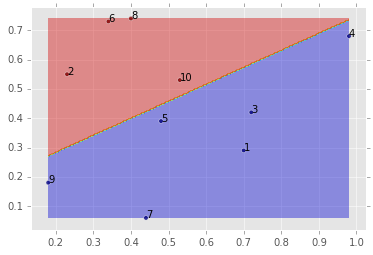

In [82]:
def draw_2D_svm(clf, x, y, target, labels=False):
    xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 200),
                         np.linspace(y.min(), y.max(), 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(x, y, c=target, alpha=0.8)
    if labels:
        for i in df.index:
            plt.annotate(i + 1, (x[i], y[i]))
    plt.show()

draw_2D_svm(clf, df[1], df[2], df[0], labels=True)

Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [70]:
clf.support_

array([3, 4, 9], dtype=int32)

In [23]:
with open('submissions/3_1.txt', 'w') as f:
    f.write("4,5,10")

# Assignment: Анализ текстов

In [24]:
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

In [34]:
n = len(newsgroups.data)

Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам вычислить TF-IDF по всем данным. При таком подходе получается, что признаки на обучающем множестве используют информацию из тестовой выборки — но такая ситуация вполне законна, поскольку мы не используем значения целевой переменной из теста. На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки известны на момент обучения, и поэтому можно ими пользоваться при обучении алгоритма.

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
newsgroups_train = vectorizer.fit_transform(newsgroups.data)

Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром (kernel='linear') при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, и для KFold. В качестве меры качества используйте долю верных ответов (accuracy).

In [72]:
from sklearn.cross_validation import KFold
from sklearn import grid_search

grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(n, n_folds=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = grid_search.GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(newsgroups_train, newsgroups.target)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1786, n_folds=5, shuffle=True, random_state=241),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

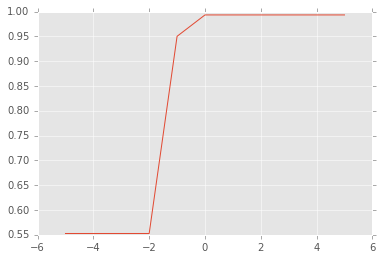

Max score: 0.993281075028 for parameter C = 1.0


In [73]:
scores = []
Cs = []
for a in gs.grid_scores_:
    scores.append(a.mean_validation_score)
    Cs.append(a.parameters['C'])
plt.plot(np.log10(Cs), scores)
plt.show()
m = max(scores)
print "Max score: {} for parameter C = {}".format(m, Cs[scores.index(m)])

Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.
Найдите 10 слов с наибольшим абсолютным значением веса (веса хранятся в поле coef_ у svm.SVC). Они являются ответом на это задание. Укажите эти слова через запятую или пробел, в нижнем регистре, в лексикографическом порядке.

In [113]:
clf = SVC(C=1.0, random_state=241, kernel='linear')
clf.fit(newsgroups_train, newsgroups.target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [158]:
feature_mapping = vectorizer.get_feature_names()
svm_coef = [abs(i) for i in clf.coef_.toarray()[0]]
topn = sorted(zip(svm_coef, feature_mapping))[-10:]
print ','.join(sorted([i[1] for i in topn]))
for coef, feat in topn:
    print feat, coef

atheism,atheists,bible,god,keith,moon,religion,sci,sky,space
sci 1.02930692719
keith 1.09709364664
bible 1.13061234466
religion 1.1390808379
sky 1.18013159514
moon 1.20161118175
atheists 1.24918000738
atheism 1.25468995124
god 1.92037940023
space 2.66316478848


In [159]:
with open('submissions/3_2.txt', 'w') as f:
    f.write("atheism,atheists,bible,god,keith,moon,religion,sci,sky,space")